In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from tqdm import tqdm

from path_explain.path_explainer_tf import PathExplainerTF
from path_explain import utils
from plot.text import text_plot
from train import load_data, build_model

In [2]:
utils.set_up_environment(visible_devices='0')

In [3]:
x_train, y_train, x_test, y_test, vocabulary_inv = load_data(20000, 400)

In [4]:
def convert_encoded(sentence):
    return [vocabulary_inv[word] for word in sentence[1:] if word != 0]
def strip_attributions(attribution, sentence):
    non_zero_mask = sentence != 0
    non_zero_mask[0] = False
    attribution = attribution[non_zero_mask]
    return attribution

In [5]:
model = tf.keras.models.load_model('model.h5')

In [6]:
lengths = np.sum(x_test != 0, axis=1)
min_indices = np.argsort(lengths)
batch_input = x_test[min_indices[:16]]
batch_pred = model(batch_input)

In [7]:
embedding_attributions = np.load('embedding_attributions.npy')
interaction_matrix = np.load('interaction_matrix.npy')

In [8]:
word_attributions = np.sum(embedding_attributions, axis=-1)
word_interactions = np.sum(interaction_matrix, axis=(2, 4))
word_interactions = word_interactions[:, :, :21]

In [9]:
batch_input_text = [list(sentence[sentence != 0]) for sentence in batch_input]
batch_input_text = [convert_encoded(sentence) for sentence in batch_input_text]

In [10]:
for i in range(16):
    print(str(i) + ')\t[{}, {:.4f}]\t'.format('positive' if y_test[min_indices[i]] == 1 else 'negative', batch_pred[i, 0]) + \
          ' '.join(batch_input_text[i]))

0)	[negative, 0.3568]	primary plot primary direction poor interpretation
1)	[negative, 0.5207]	read the book forget the movie
2)	[negative, 0.7482]	more suspenseful more subtle much much more disturbing
3)	[negative, 0.3275]	what a script what a story what a mess
4)	[positive, 0.7894]	brilliant and moving performances by tom and peter finch
5)	[negative, 0.4470]	i hope this group of film makers never re <UNKNOWN/>
6)	[positive, 0.7740]	just love the interplay between two great characters of stage screen veidt barrymore
7)	[positive, 0.6966]	this is a great movie too bad it is not available on home video
8)	[positive, 0.7817]	without a doubt one of tobe best epic great special effects and the vamp me baby
9)	[positive, 0.7523]	a mesmerizing film that certainly keeps your attention ben daniels is fascinating and courageous to watch
10)	[positive, 0.8858]	absolutely fantastic whatever i say wouldn't do this underrated movie the justice it deserves watch it now fantastic
11)	[positive, 0.8

In [11]:
full_text = {
    3: "What a script, what a story, what a mess!"
}

In [17]:
def plot_interactions(word_array,
                      interactions,
                      include_legend=False,
                      vmin=None,
                      vmax=None,
                      **kwargs):
    num_words = len(word_array)
    interactions = interactions[:num_words, :num_words]
    for i in range(num_words):
        select_interactions = interactions[i]
        select_interactions[i] = 0.0
        text_plot(word_array, select_interactions, include_legend, vmin=vmin, vmax=vmax, fontsize=20)

In [44]:
def plot_all(i):
    text_plot(batch_input_text[i], strip_attributions(word_attributions[i], batch_input[i]), include_legend=True, fontsize=20)

    indices = np.where(~np.eye(word_interactions.shape[0], dtype=bool))
    bounds = np.max(np.abs(word_interactions[i][indices]))
    plot_interactions(batch_input_text[i], word_interactions[i], vmin=-bounds, vmax=bounds, fontsize=20)

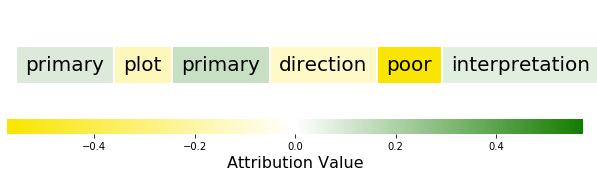

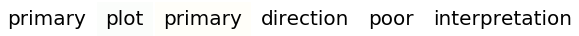

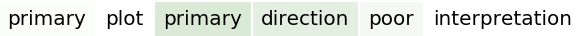

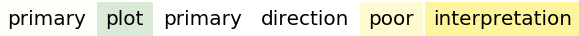

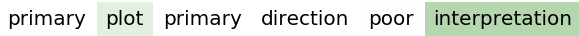

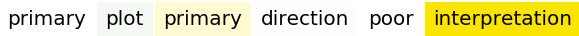

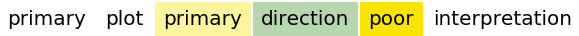

In [46]:
plot_all(0)

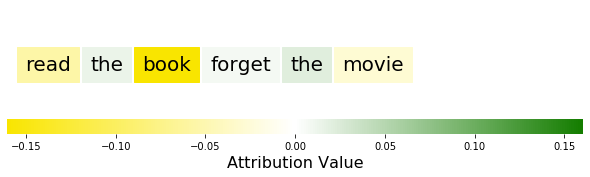

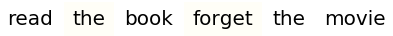

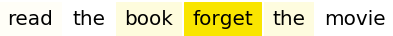

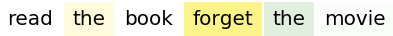

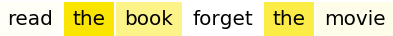

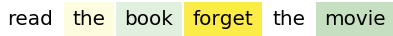

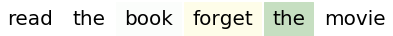

In [47]:
plot_all(1)

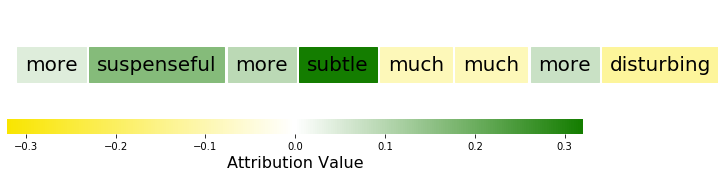

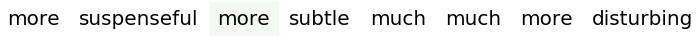

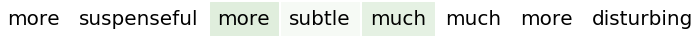

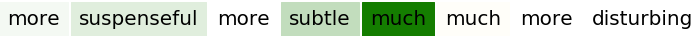

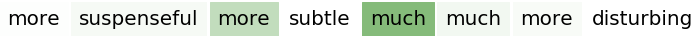

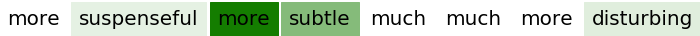

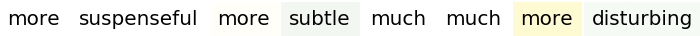

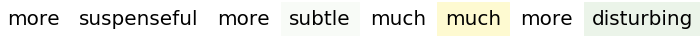

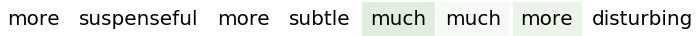

In [48]:
plot_all(2)

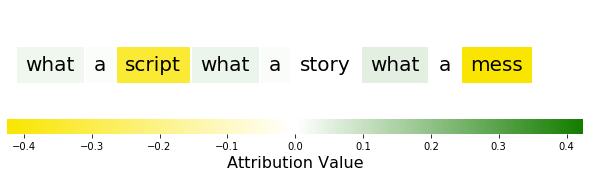

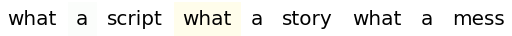

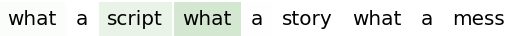

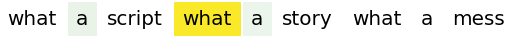

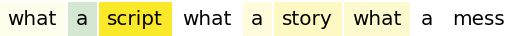

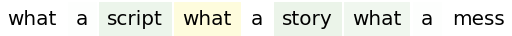

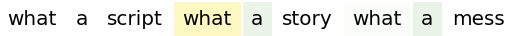

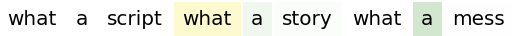

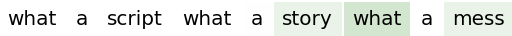

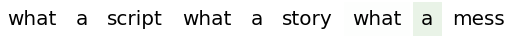

In [49]:
plot_all(3)

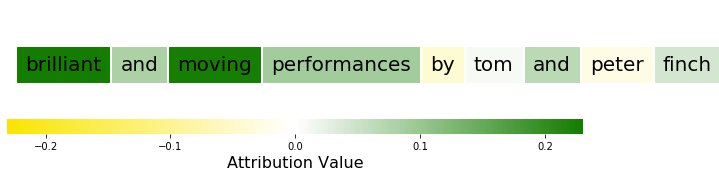

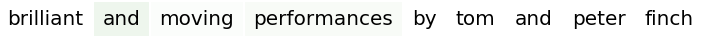

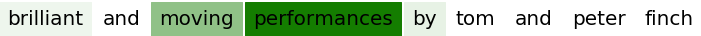

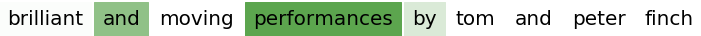

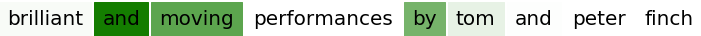

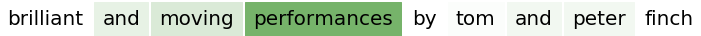

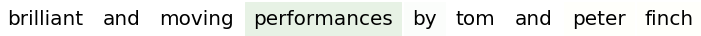

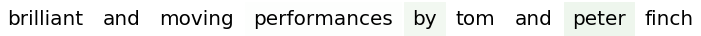

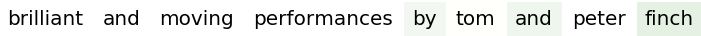

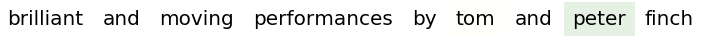

In [50]:
plot_all(4)

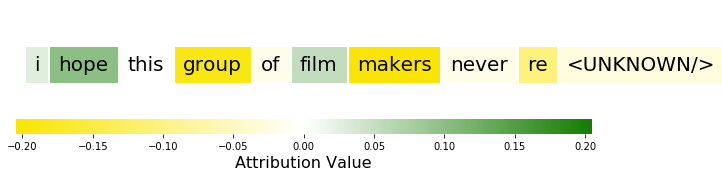

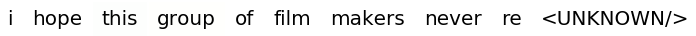

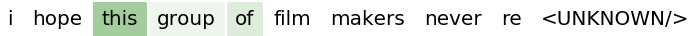

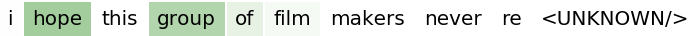

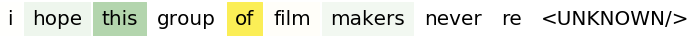

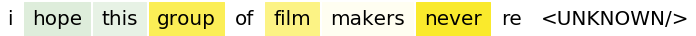

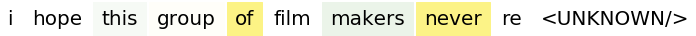

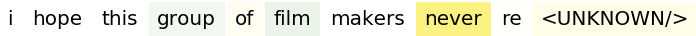

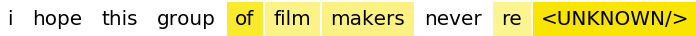

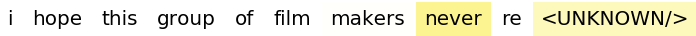

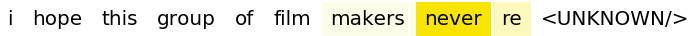

In [51]:
plot_all(5)

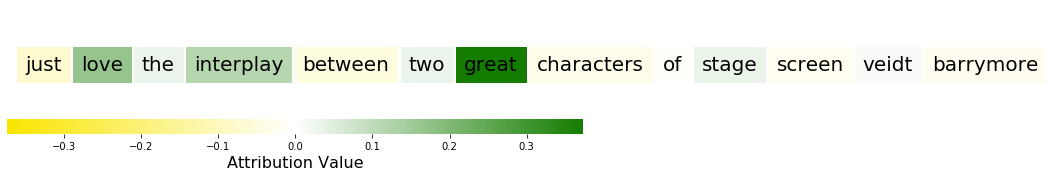

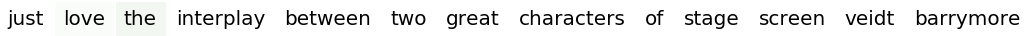

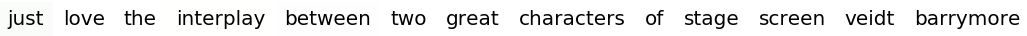

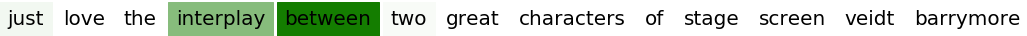

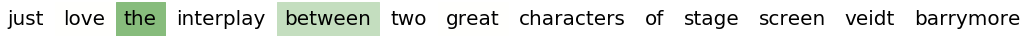

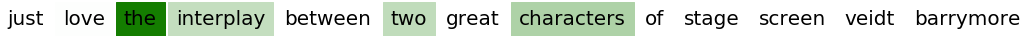

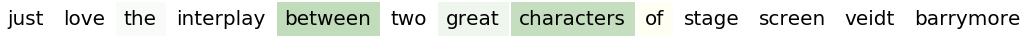

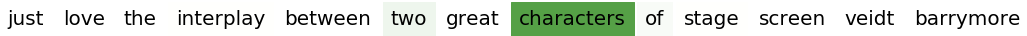

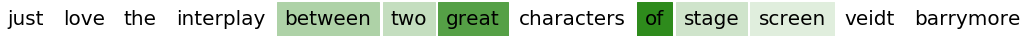

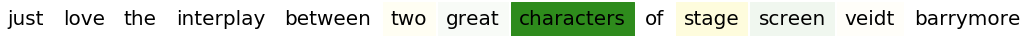

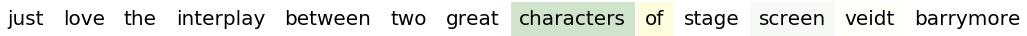

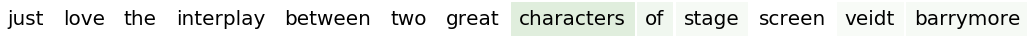

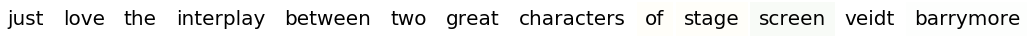

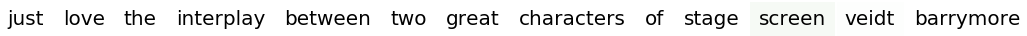

In [52]:
plot_all(6)

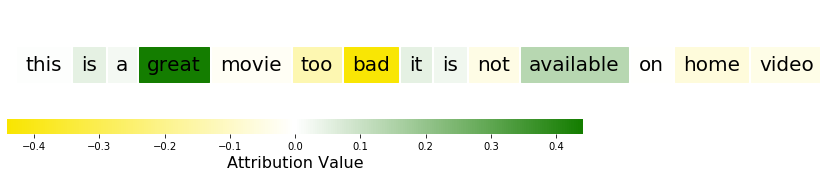

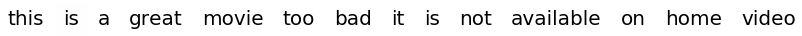

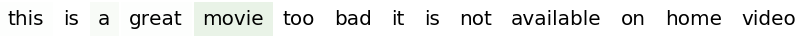

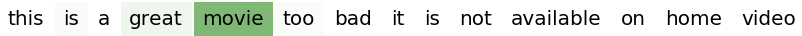

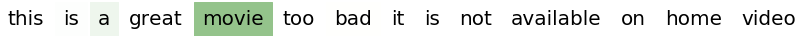

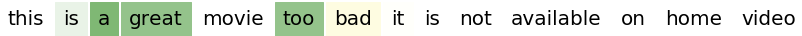

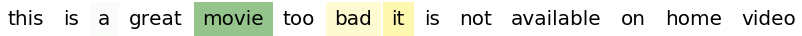

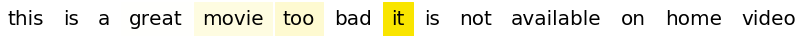

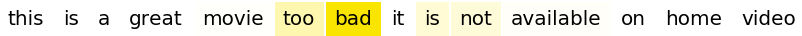

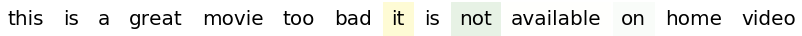

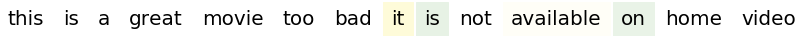

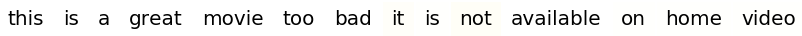

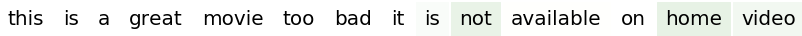

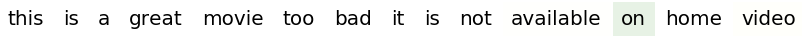

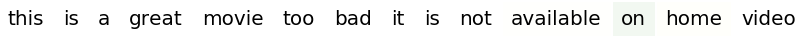

In [53]:
plot_all(7)

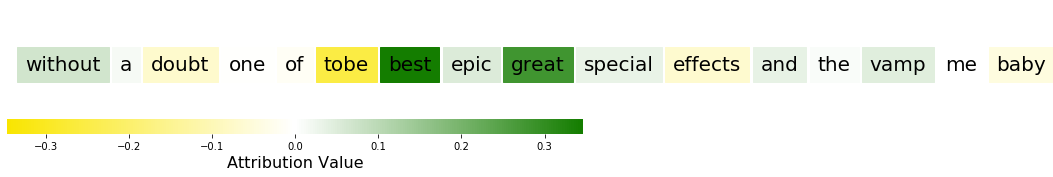

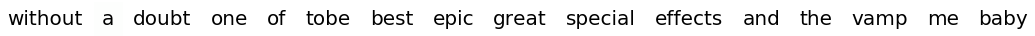

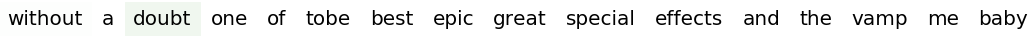

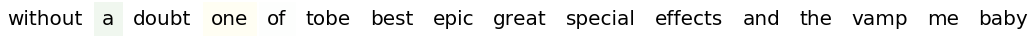

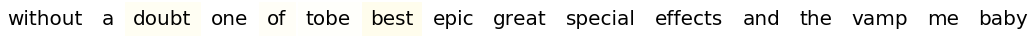

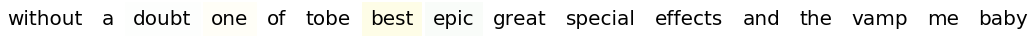

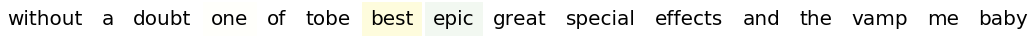

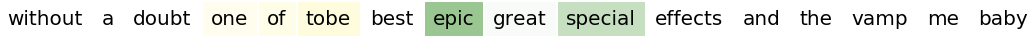

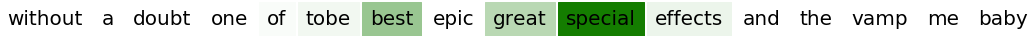

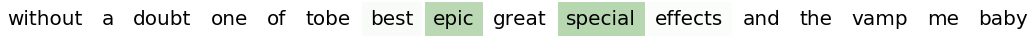

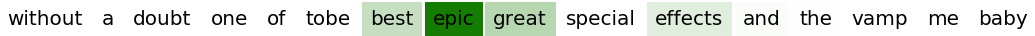

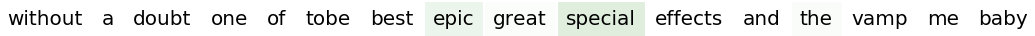

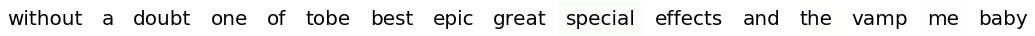

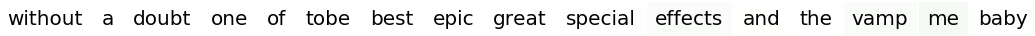

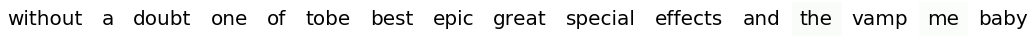

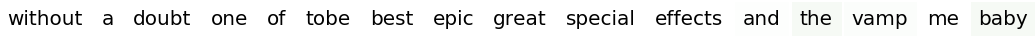

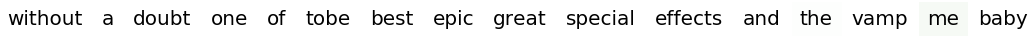

In [54]:
plot_all(8)

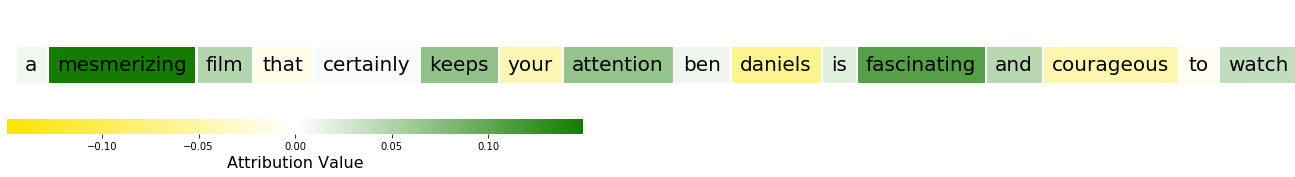

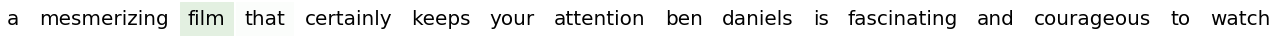

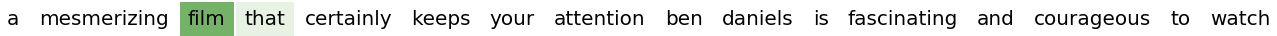

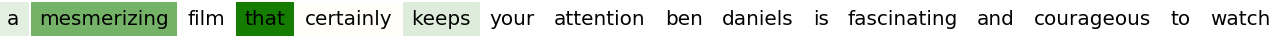

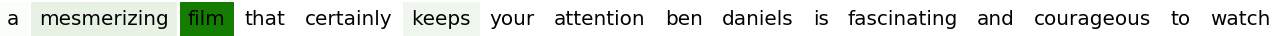

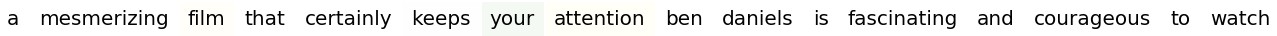

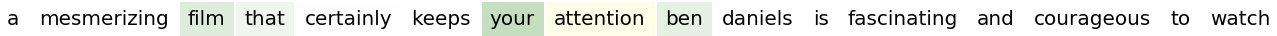

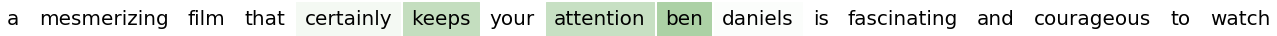

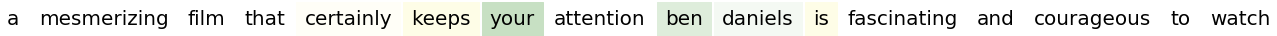

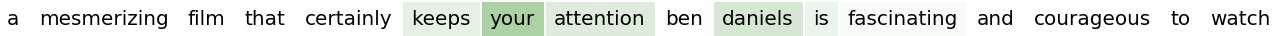

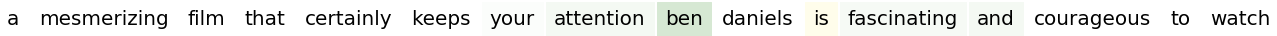

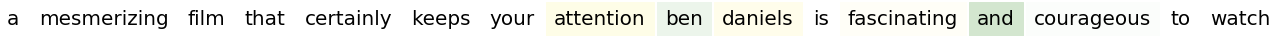

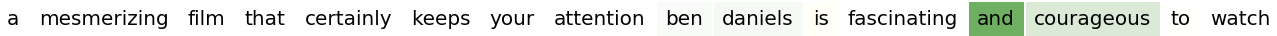

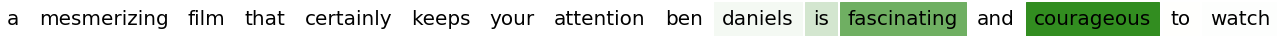

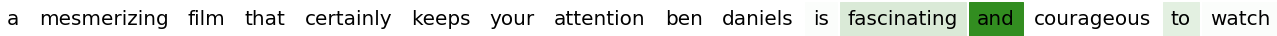

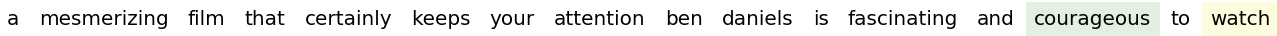

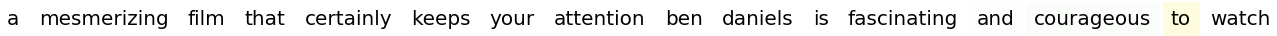

In [55]:
plot_all(9)

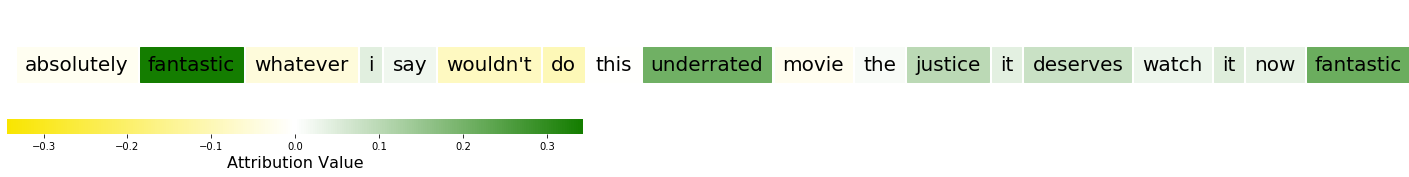

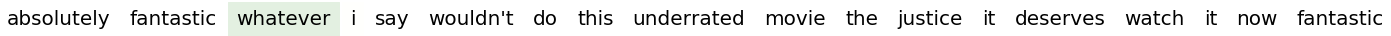

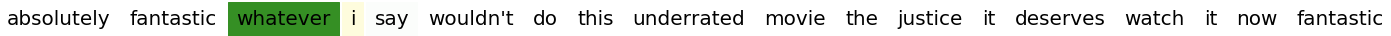

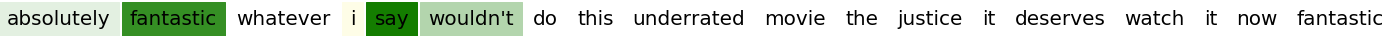

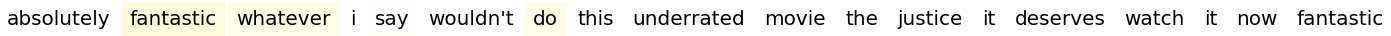

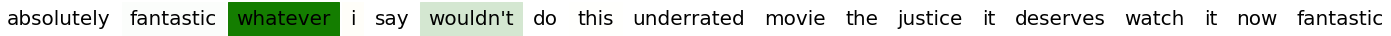

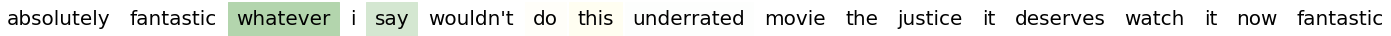

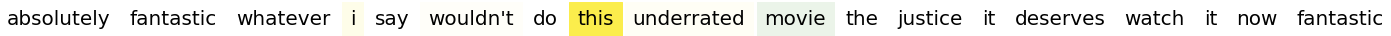

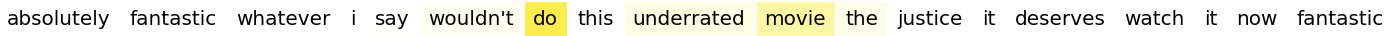

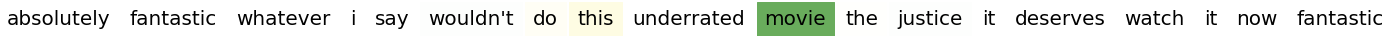

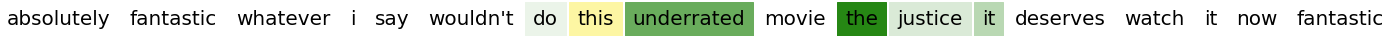

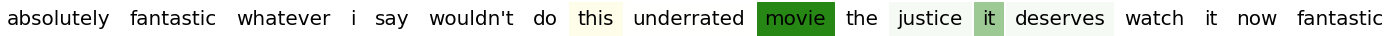

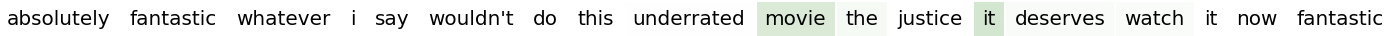

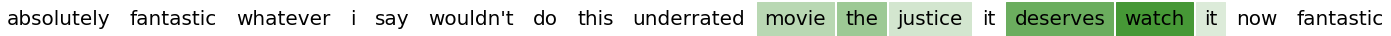

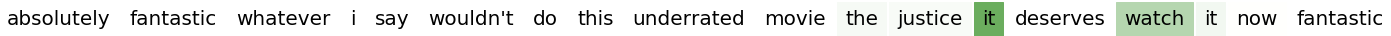

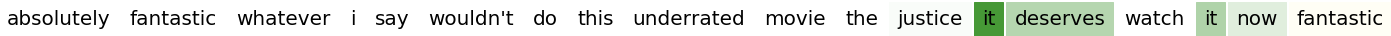

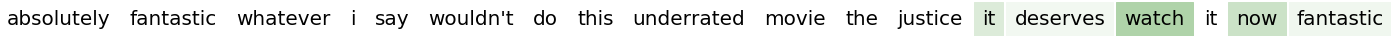

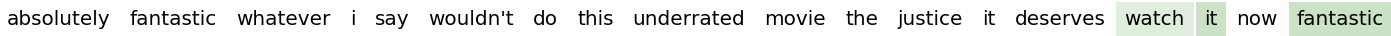

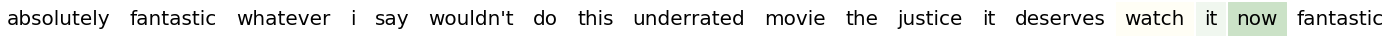

In [56]:
plot_all(10)

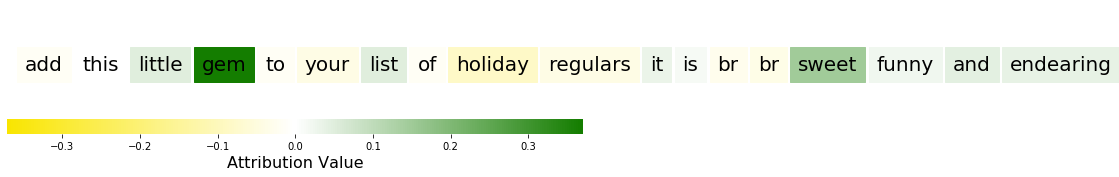

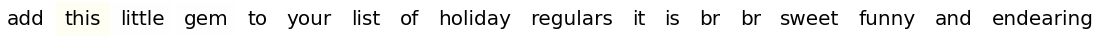

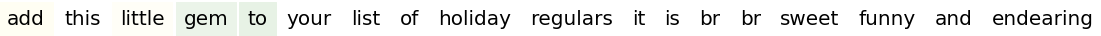

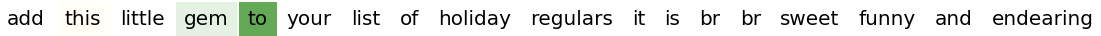

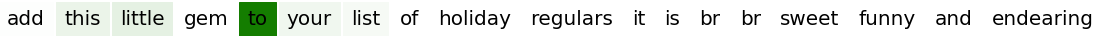

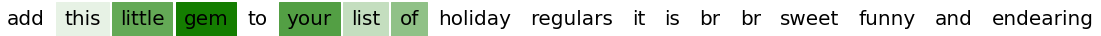

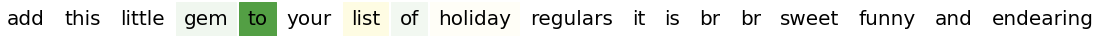

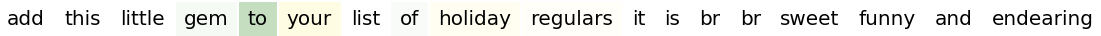

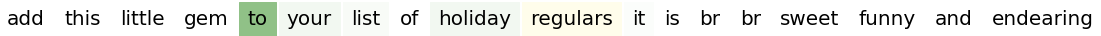

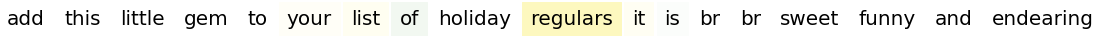

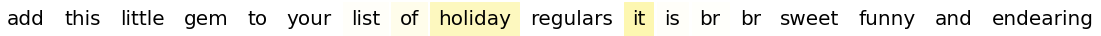

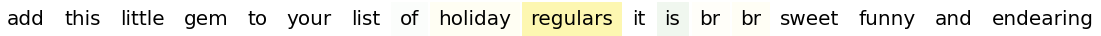

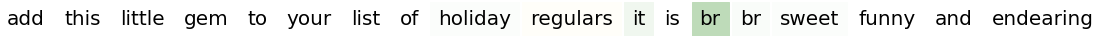

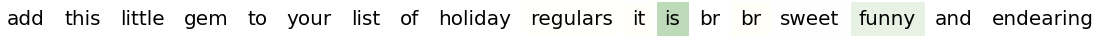

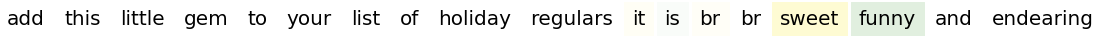

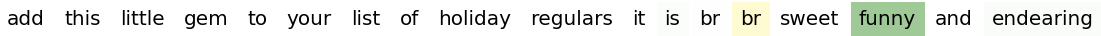

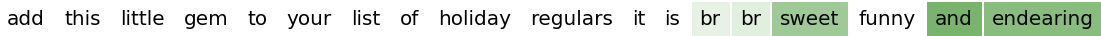

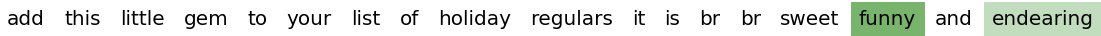

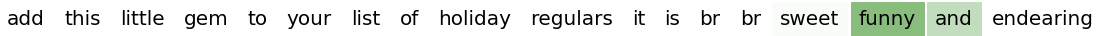

In [57]:
plot_all(11)

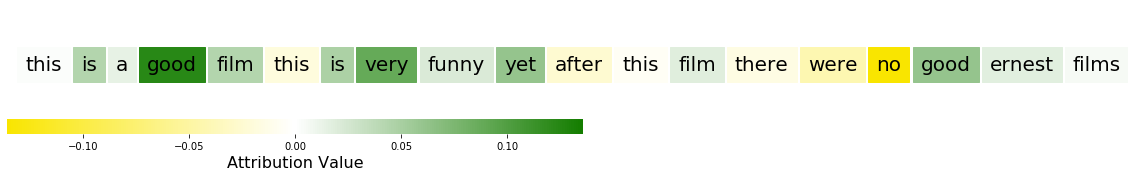

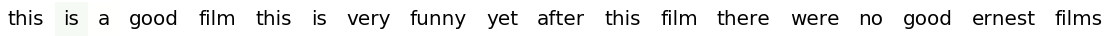

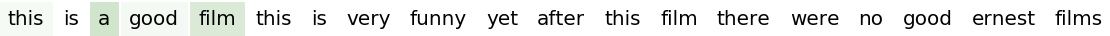

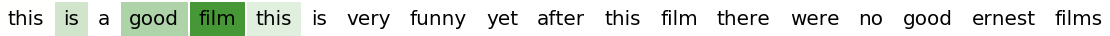

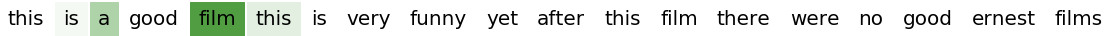

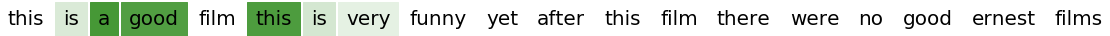

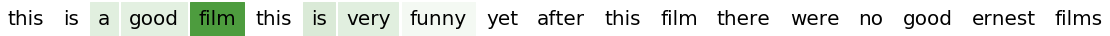

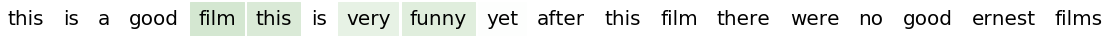

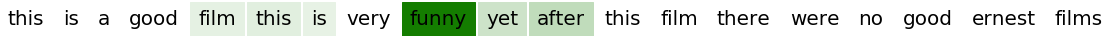

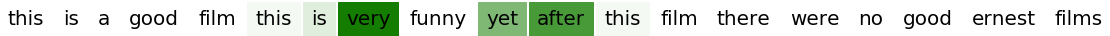

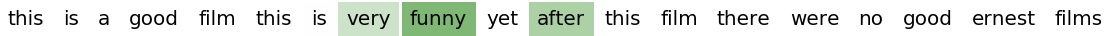

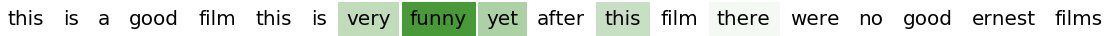

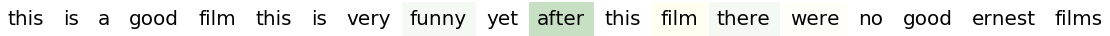

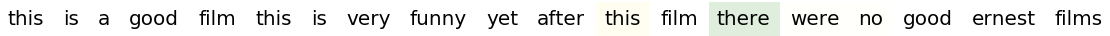

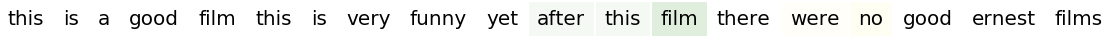

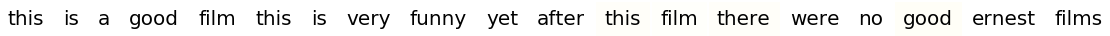

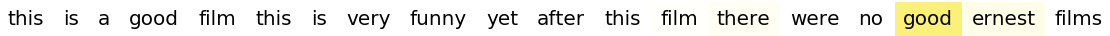

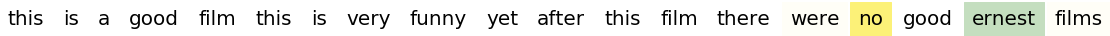

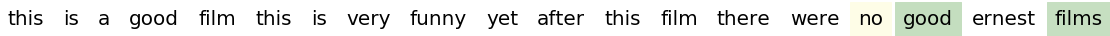

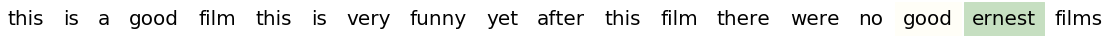

In [58]:
plot_all(12)

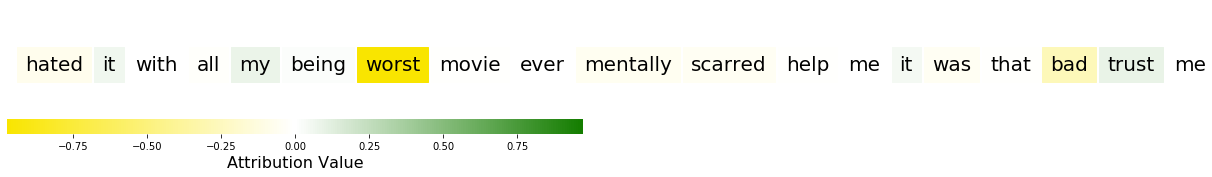

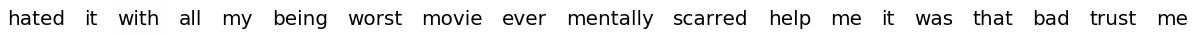

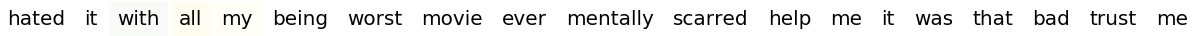

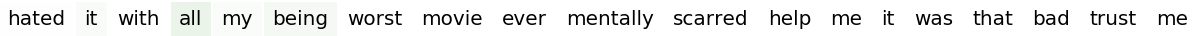

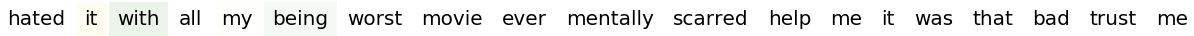

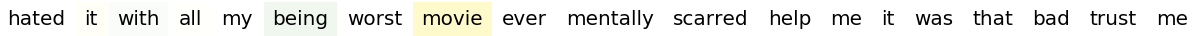

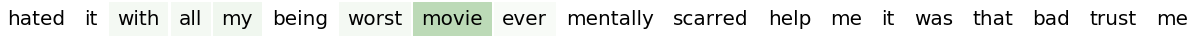

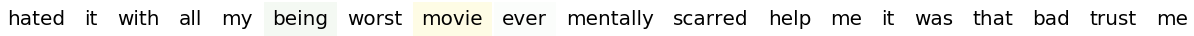

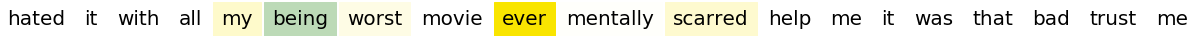

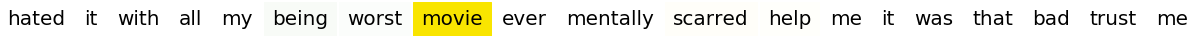

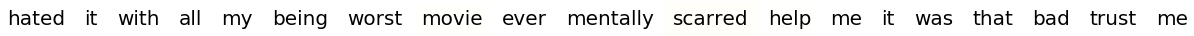

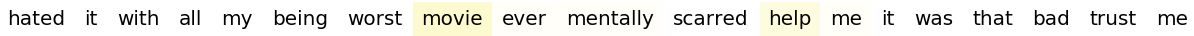

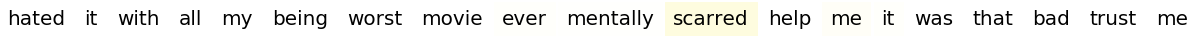

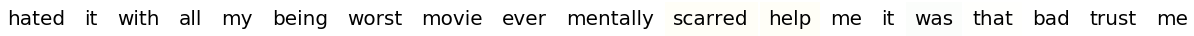

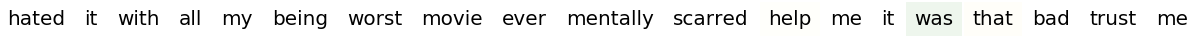

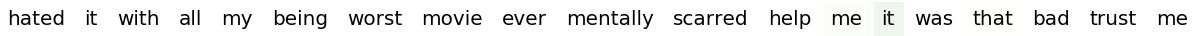

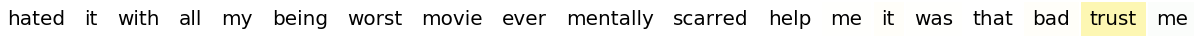

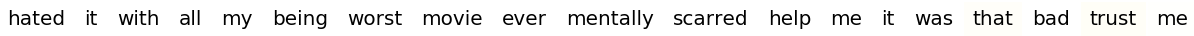

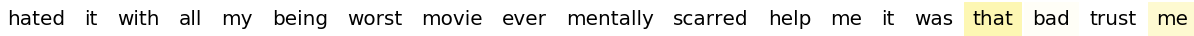

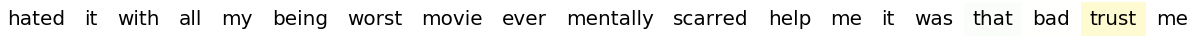

In [59]:
plot_all(13)

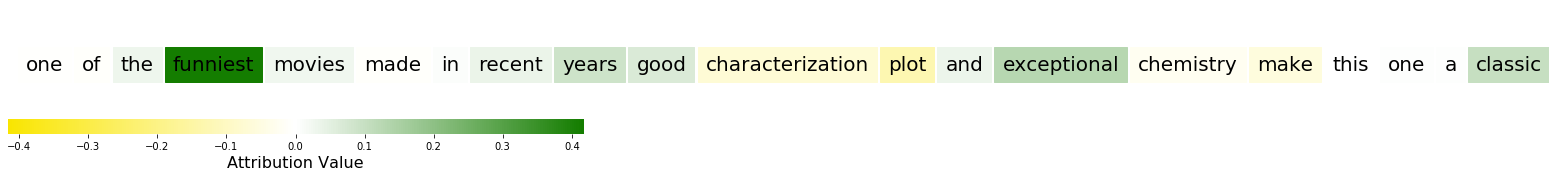

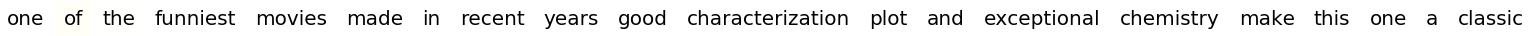

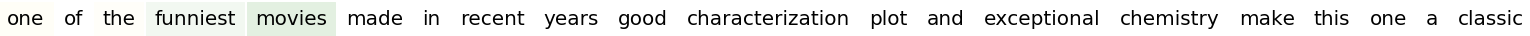

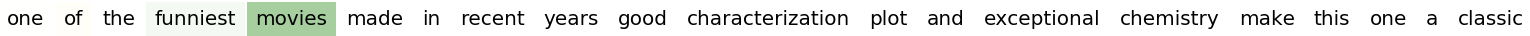

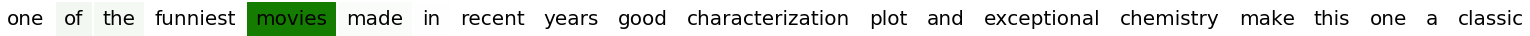

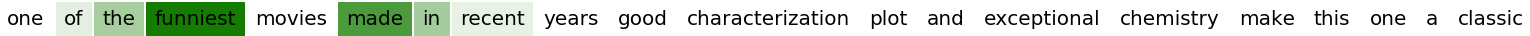

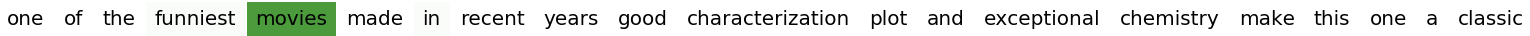

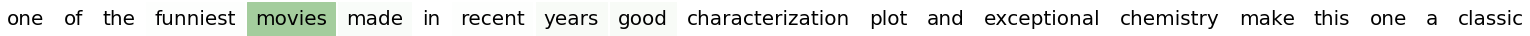

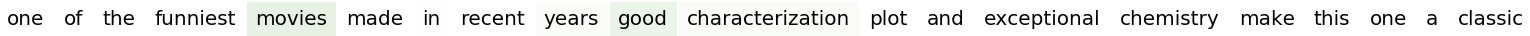

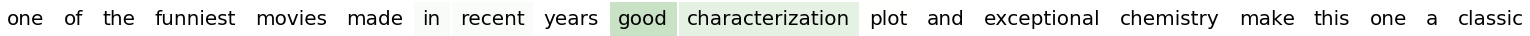

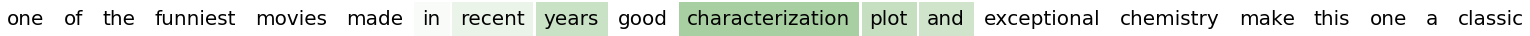

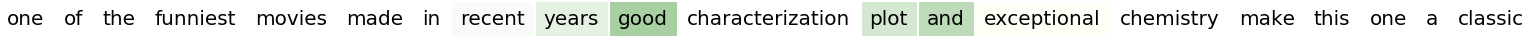

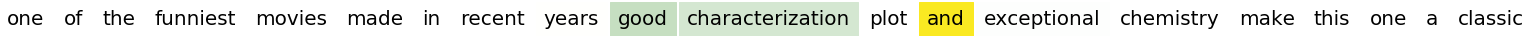

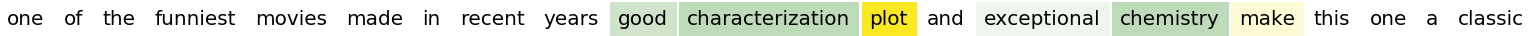

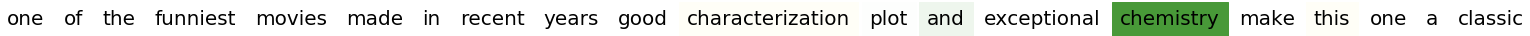

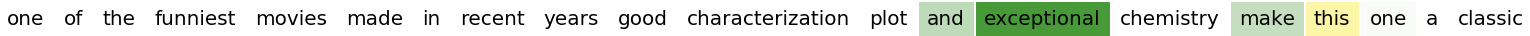

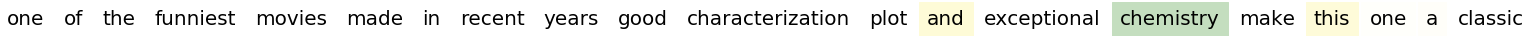

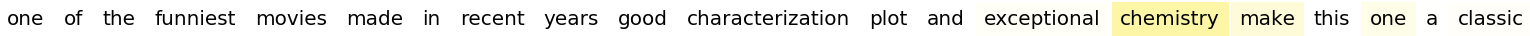

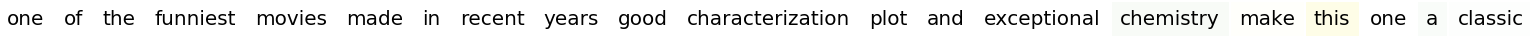

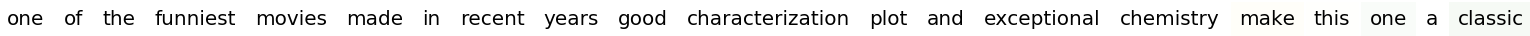

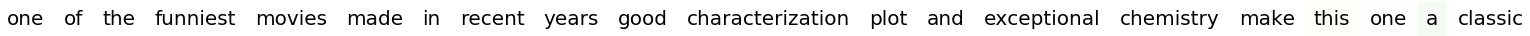

In [60]:
plot_all(14)

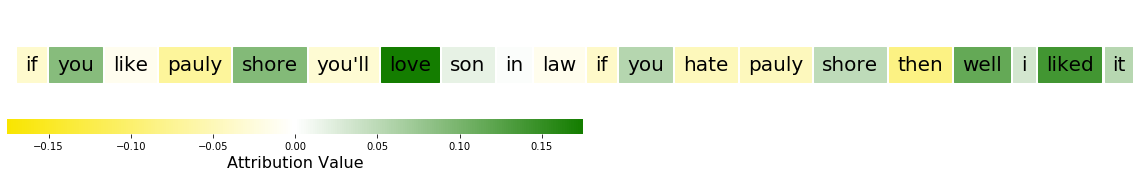

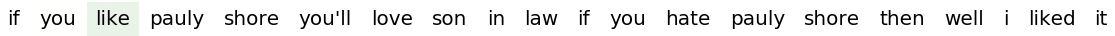

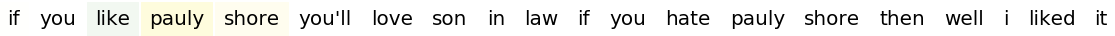

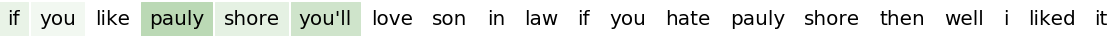

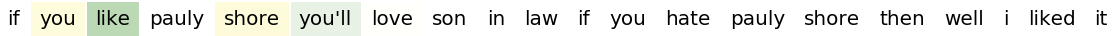

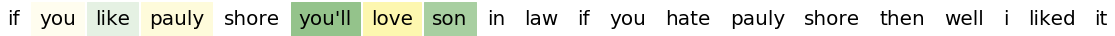

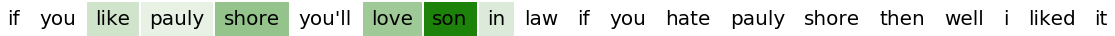

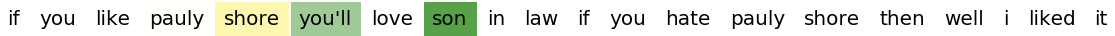

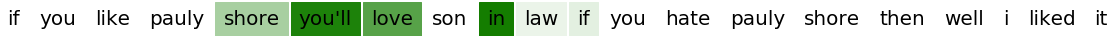

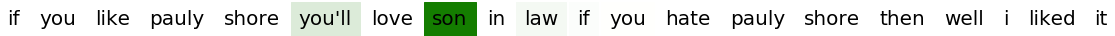

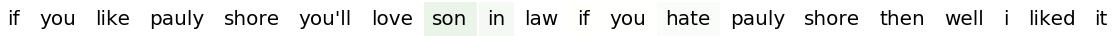

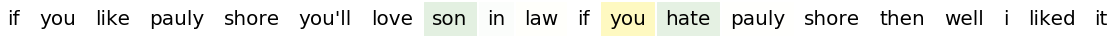

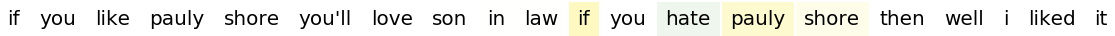

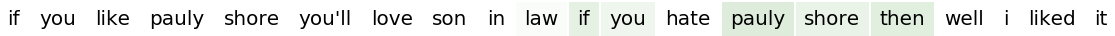

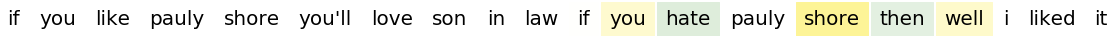

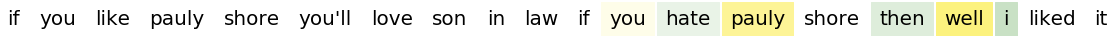

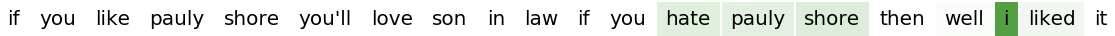

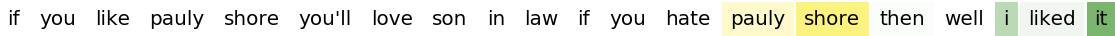

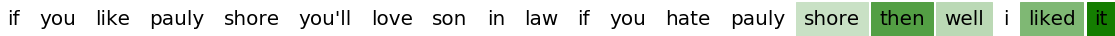

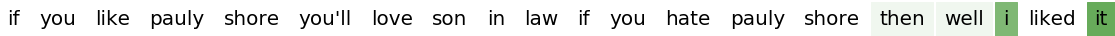

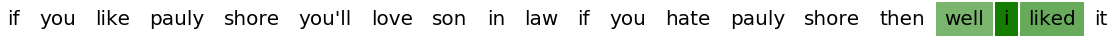

In [61]:
plot_all(15)